In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ordpay = pd.read_csv('./datasets/olist_order_payments_dataset.csv')

In [3]:
#Vemos la dimensión del dataset.
ordpay.shape

(103886, 5)

In [4]:
#Las columnas poseen información relacionada al pago, pagos parciales, medio de pago, cuotas e importe total.
ordpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [5]:
#Confirmo la inexistencia de valores nulos.
ordpay.isnull().sum().sort_values()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [6]:
#Verifico que no hay valores duplicados.
ordpay.duplicated().sum()

0

In [7]:
#Anáisis preliminar de los datos numéricos de 3 columnas. Vemos valores extremos, rango de datos y en especial outliers (relación de mediana y media).
ordpay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [8]:
#Veo el dataset importado.
ordpay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Comienzo el análisis gráfico de los datos.

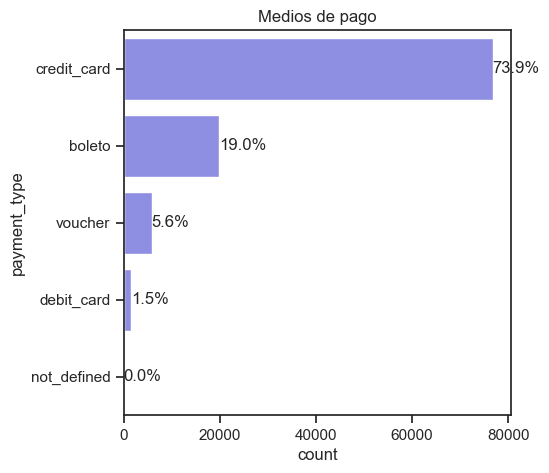

In [53]:
#Vemos la distribución del tipo de pago.
pay_count = ordpay['payment_type'].value_counts().sort_values(ascending=False)
order = pay_count.index
plt.figure(figsize=(5,5))
plt.title("Medios de pago")
sns.countplot(data=ordpay, y='payment_type', color="#8080f0", order=order)

npkmn = pay_count.values.sum()
for i, contador in enumerate(pay_count):
   pcnt = '{:0.1f}%'.format(100*contador/npkmn)
   plt.text(contador-20, i, pcnt, va ='center')

<Figure size 1000x1000 with 0 Axes>

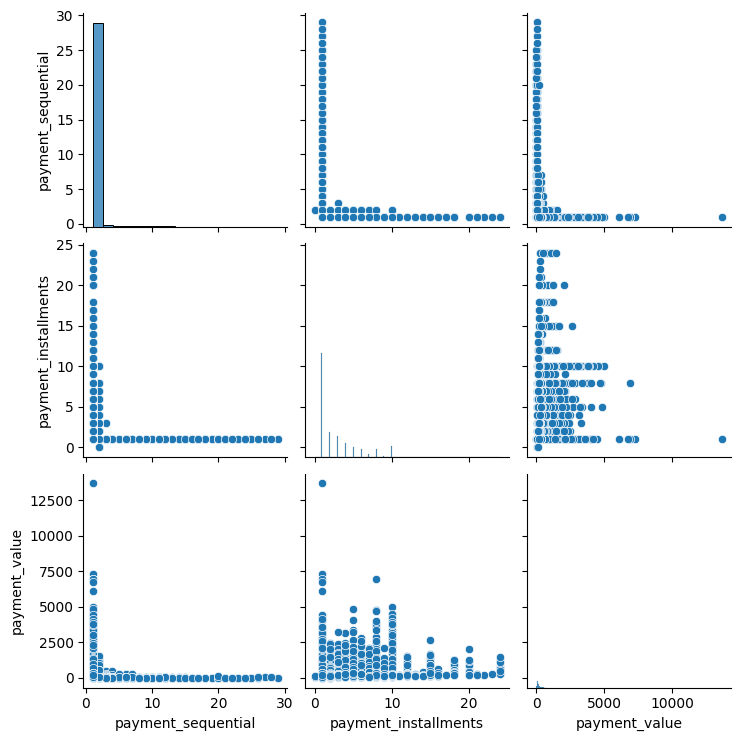

In [18]:
#Grafico la distribución de los datos numéricos en pares ordenados.
plt.figure(figsize=(10,10))
sns.pairplot(ordpay)

<AxesSubplot:title={'center':'Nº pagos anticipados'}>

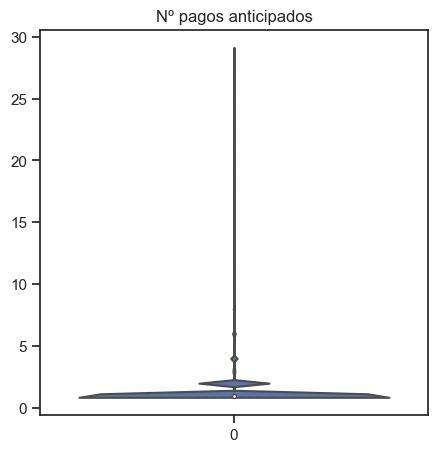

In [38]:
#El gráfico de violín apenas pueden graficar la distribución de valores.
plt.figure(figsize=(5,5))
plt.title("Nº pagos anticipados")
sns.violinplot(ordpay['payment_sequential'])

<AxesSubplot:title={'center':'Nº pagos anticipados'}, ylabel='payment_sequential'>

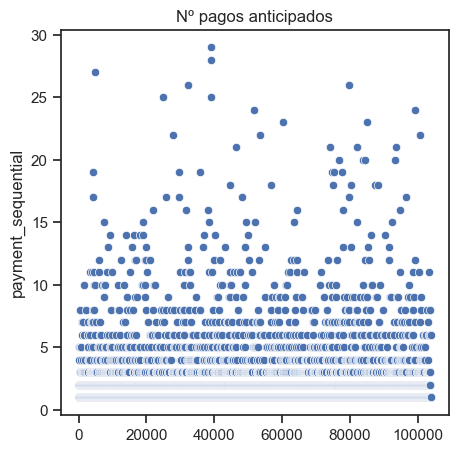

In [43]:
#Con un gráfico de tipo scatter podemos ver mejor la distribución.
plt.figure(figsize=(5,5))
plt.title("Nº pagos anticipados")
sns.scatterplot(ordpay['payment_sequential'])

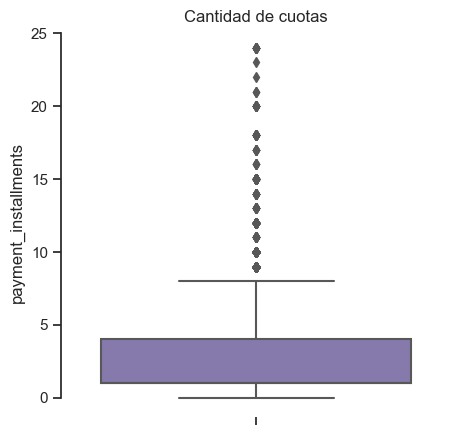

In [39]:
#El gráfico de caja apenas pueden graficar la distribución de valores.
plt.figure(figsize=(5,5))
plt.title("Cantidad de cuotas")
sns.boxplot(y="payment_installments",
            palette=["m", "g"],
            data=ordpay)
sns.despine(offset=1, trim=True)

<AxesSubplot:title={'center':'Cantidad de cuotas'}, ylabel='payment_installments'>

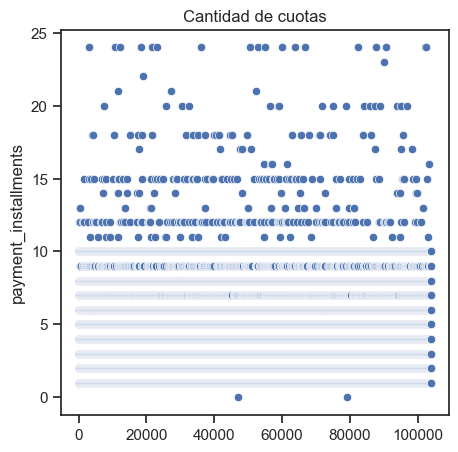

In [40]:
#Con un gráfico de tipo scatter podemos ver mejor la distribución.
plt.figure(figsize=(5,5))
plt.title("Cantidad de cuotas")
sns.scatterplot(ordpay['payment_installments'])

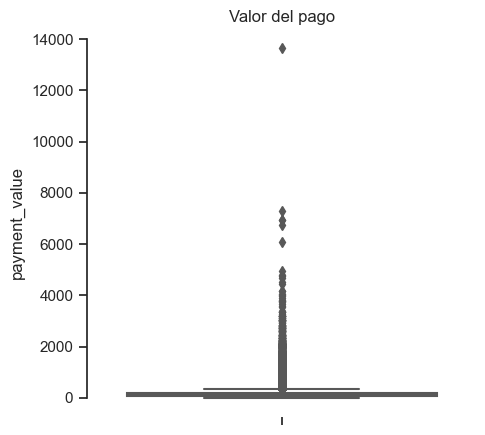

In [41]:
#El gráfico de caja apenas pueden graficar la distribución de valores.
plt.figure(figsize=(5,5))
plt.title("Valor del pago")
sns.boxplot(y="payment_value",
            palette=["m", "g"],
            data=ordpay)
sns.despine(offset=1, trim=True)

<AxesSubplot:title={'center':'Valor del pago'}, ylabel='payment_value'>

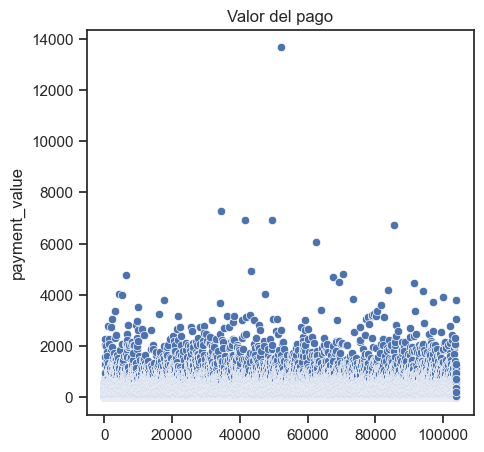

In [42]:
#Con un gráfico de tipo scatter podemos ver mejor la distribución.
plt.figure(figsize=(5,5))
plt.title("Valor del pago")
sns.scatterplot(ordpay['payment_value'])

Conclusiones:

- Payment type: dentro de los tipos de pago encontramos 5 alternativas.

- Payment sequential: la mayor concentración de datos dentro se encuentra dentro del primer cuartil, mostrando incluso que tenemos muchos ouliers o valores fuera del rango principal.

- Payment installment: la distribución posee un rango acotado (si tenemos en cuenta la cantidad de datos), mostrando algunos outliers que hacen ruido en la distribución.

- Payment value: como los anteriores, la mayor concentración de datos está dentro del primer cuartil. Se evidencian pocos outliers, pero con valores muy extremos que disparan la distribución de datos.


ETL (recomendado):

- Renombrar columnas.
- Eliminar datos outliers (4to. cuartil).